<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/Kaggle_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
Reference: https://www.kaggle.com/competitions/spaceship-titanic/overview


In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [570]:
df = pd.read_csv('train.csv')
dt = pd.read_csv('test.csv')

df['is_train'] = 1
dt['is_train'] = 0

all_data = pd.concat([df, dt], axis=0)
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,is_train
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [571]:
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,is_train
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.670239
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.470144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [572]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  is_train      12970 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.6+ MB


In [573]:
all_data.isnull().sum()

,0
PassengerId,0
HomePlanet,288
CryoSleep,310
Cabin,299
Destination,274
Age,270
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [574]:
all_data['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


In [575]:
all_data.duplicated().sum()

0

In [576]:
for col in all_data.columns:
    print(col, df[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

In [577]:
for col in all_data.columns:
    print(col, all_data[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9271_01' '9273_01' '9277_01']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1278. 2835.  652.]
FoodCourt [   0.    9. 3576. ...  873. 4813.  601.]
ShoppingMall [   0.   25.  371. ... 2156. 1258. 3851.]
Spa [   0.  549. 6715. ... 1872. 1716. 1812.]
VRDeck [    0.    44.    49. ...  3093. 14834.   494.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley

## Initial Data Visualization

In [578]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = ['Transported']

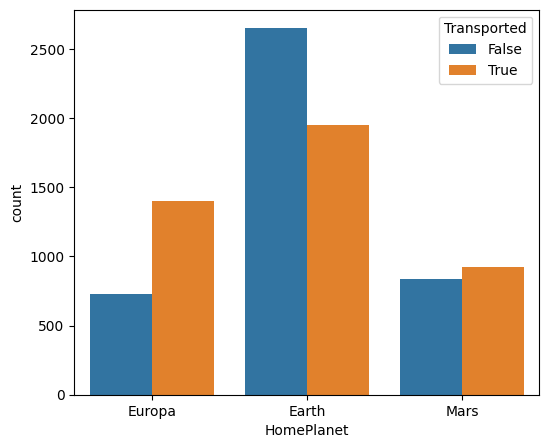

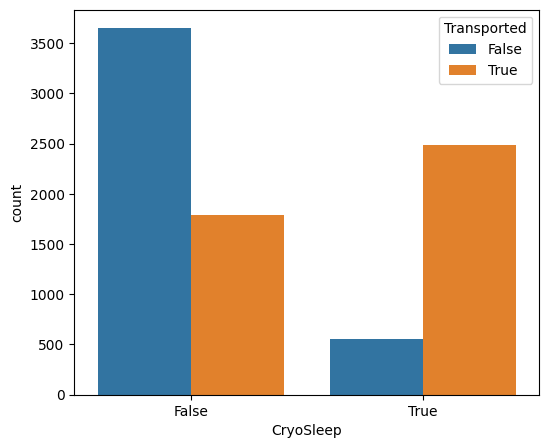

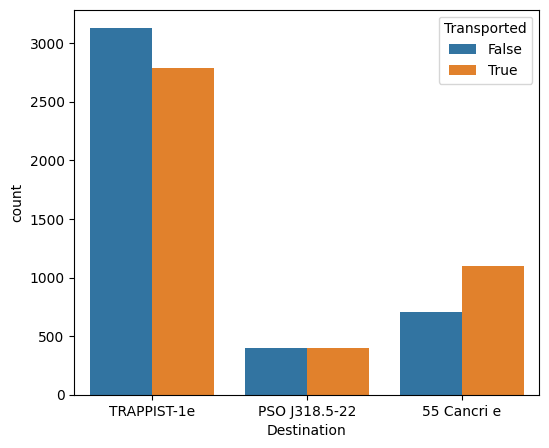

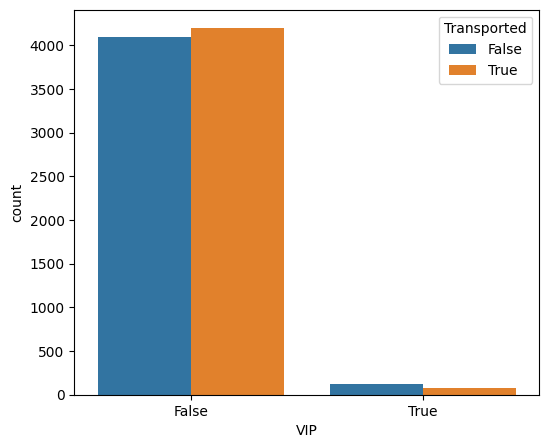

In [579]:
for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=target_col[0])
    plt.show()

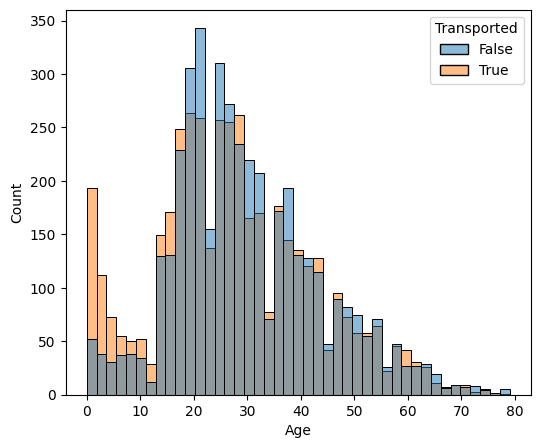

In [580]:
plt.figure(figsize=(6, 5))
sns.histplot(x='Age', data=df, hue=target_col[0])
plt.show()

In [581]:
pd.pivot_table(df, index='Transported', values=numerical_cols, aggfunc='mean')

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


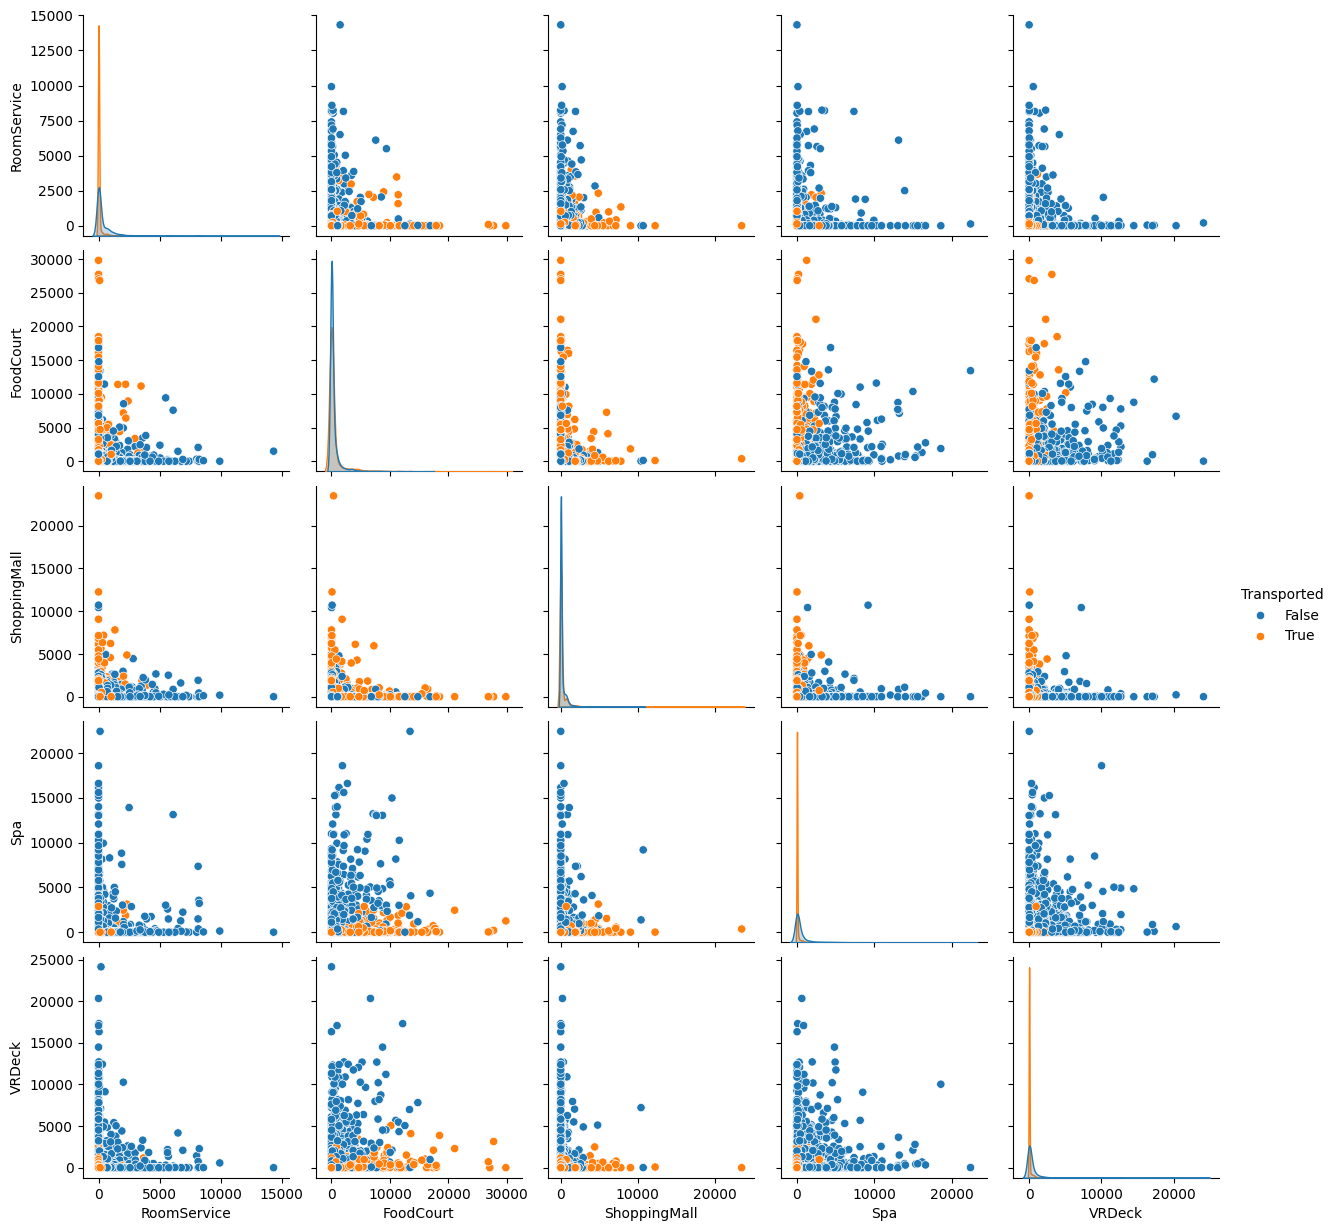

In [582]:
sns.pairplot(df, vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], hue=target_col[0])
plt.show()

## Feature Engineering

In [583]:
all_data.drop(['VIP'], axis=1, inplace=True)

## Generate New Features

In [584]:
def extract_last_name(x):
    try:
        return str(x).split(' ')[1]
    except (IndexError, AttributeError):
        return None

In [585]:
all_data['LastName'] = all_data['Name'].apply(extract_last_name)
all_data['family_size'] = all_data.groupby('LastName')['LastName'].transform('count')

all_data.drop(['Name'], axis=1, inplace=True)
all_data.drop(['LastName'], axis=1, inplace=True)

In [586]:
all_data['PassengerGroup'] = all_data['PassengerId'].apply(lambda x: x.split('_')[0])
all_data['PassengerNumber'] = all_data['PassengerId'].apply(lambda x: x.split('_')[1])
all_data['GroupSize'] = all_data.groupby('PassengerGroup')['PassengerGroup'].transform('count')

all_data.drop(['PassengerId', 'PassengerGroup', 'PassengerNumber'], axis=1, inplace=True)

In [587]:
all_data["TravelAlone"] = (all_data["family_size"] == 1) | (all_data["GroupSize"] == 1)

In [588]:
all_data['CabinDeck'] = all_data['Cabin'].fillna('').apply(lambda x: x.split('/')[0] if x else np.nan)
all_data['CabinNum'] = all_data['Cabin'].fillna('').apply(lambda x: x.split('/')[1] if x else np.nan)
all_data['CabinSide'] = all_data['Cabin'].fillna('').apply(lambda x: x.split('/')[2] if x else np.nan)

all_data["CabinDeck"].fillna(all_data["CabinDeck"].mode()[0],inplace=True)
all_data["CabinSide"].fillna(all_data["CabinSide"].mode()[0],inplace=True)
all_data["CabinNum"].fillna(all_data["CabinNum"].median(),inplace=True)

all_data.drop(['Cabin'], axis=1, inplace=True)

In [589]:
def cabin_regions(all_data):
    all_data["CabinNum"] = pd.to_numeric(all_data["CabinNum"], errors='coerce')
    all_data["Cabin_Region1"] = (all_data["CabinNum"]<300)
    all_data["Cabin_Region2"] = (all_data["CabinNum"]>=300) & (all_data["CabinNum"]<600)
    all_data["Cabin_Region3"] = (all_data["CabinNum"]>=600) & (all_data["CabinNum"]<900)
    all_data["Cabin_Region4"] = (all_data["CabinNum"]>=900) & (all_data["CabinNum"]<1200)
    all_data["Cabin_Region5"] = (all_data["CabinNum"]>=1200) & (all_data["CabinNum"]<1500)
    all_data["Cabin_Region6"] = (all_data["CabinNum"]>=1500)

In [590]:
cabin_regions(all_data)

In [591]:
all_data.drop(['CabinNum'], axis=1, inplace=True)

In [592]:
def classify_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-aged Adult'
    elif 51 <= age <= 65:
        return 'Older Adult'
    elif age > 65:
        return 'Senior'
    else:
        return 'Unknown'

In [593]:
all_data['AgeGroup'] = all_data['Age'].apply(classify_age)

all_data.drop(['Age'], axis=1, inplace=True)

In [594]:
all_data['RoomService'].fillna(all_data['RoomService'].median(), inplace=True)
all_data['FoodCourt'].fillna(all_data['FoodCourt'].median(), inplace=True)
all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].median(), inplace=True)
all_data['Spa'].fillna(all_data['Spa'].median(), inplace=True)
all_data['VRDeck'].fillna(all_data['VRDeck'].median(), inplace=True)

In [595]:
all_data['TotalExpenses'] = all_data['RoomService'] + all_data['FoodCourt'] + all_data['ShoppingMall'] + all_data['Spa'] + all_data['VRDeck']

In [596]:
def expenditure_category(all_data):
    expense_category = []

    for i in all_data["TotalExpenses"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")

    all_data["Expenditure_Category"] = expense_category

In [597]:
expenditure_category(all_data)

In [598]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            12682 non-null  object 
 1   CryoSleep             12660 non-null  object 
 2   Destination           12696 non-null  object 
 3   RoomService           12970 non-null  float64
 4   FoodCourt             12970 non-null  float64
 5   ShoppingMall          12970 non-null  float64
 6   Spa                   12970 non-null  float64
 7   VRDeck                12970 non-null  float64
 8   Transported           8693 non-null   object 
 9   is_train              12970 non-null  int64  
 10  family_size           12676 non-null  float64
 11  GroupSize             12970 non-null  int64  
 12  TravelAlone           12970 non-null  bool   
 13  CabinDeck             12970 non-null  object 
 14  CabinSide             12970 non-null  object 
 15  Cabin_Region1         129

In [599]:
all_data.isnull().sum()

,0
HomePlanet,288
CryoSleep,310
Destination,274
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,4277
is_train,0


In [600]:
for label in all_data.columns:
    print(label, all_data[label].unique())

HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
RoomService [   0.  109.   43. ... 1278. 2835.  652.]
FoodCourt [   0.    9. 3576. ...  873. 4813.  601.]
ShoppingMall [   0.   25.  371. ... 2156. 1258. 3851.]
Spa [   0.  549. 6715. ... 1872. 1716. 1812.]
VRDeck [    0.    44.    49. ...  3093. 14834.   494.]
Transported [False True nan]
is_train [1 0]
family_size [ 3.  4.  7.  9. 10.  5.  6. 12.  2.  8. nan  1. 11. 13. 16. 15. 14. 19.
 17. 18.]
GroupSize [1 2 3 6 4 7 5 8]
TravelAlone [ True False]
CabinDeck ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
CabinSide ['P' 'S']
Cabin_Region1 [ True False]
Cabin_Region2 [False  True]
Cabin_Region3 [False  True]
Cabin_Region4 [False  True]
Cabin_Region5 [False  True]
Cabin_Region6 [False  True]
AgeGroup ['Middle-aged Adult' 'Young Adult' 'Older Adult' 'Teenager' 'Child'
 'Unknown' 'Senior']
TotalExpenses [    0.   736. 10383. ... 15375.   315.  5478.]
Expenditure_Category ['

### Handling Missing Values

In [601]:
all_data['HomePlanet'].fillna(all_data['HomePlanet'].mode()[0], inplace=True)
all_data['CryoSleep'].fillna(all_data['CryoSleep'].mode()[0], inplace=True)
all_data['Destination'].fillna(all_data['Destination'].mode()[0], inplace=True)

In [602]:
# all_data['TotalExpenses'].fillna(all_data['TotalExpenses'].median(), inplace=True)
all_data['family_size'].fillna(1, inplace=True)


In [603]:
# all_data['TotalExpenses'].fillna(all_data['TotalExpenses'].median(), inplace=True)
all_data['family_size'].fillna(1, inplace=True)


In [604]:
all_data.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,4277
is_train,0


In [605]:
all_data.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,4277
is_train,0


### Log transformation of Numerical Values

In [606]:
log_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']
for col in log_cols:
    all_data[col] = np.log1p(all_data[col])

## Final Data Visualization

In [607]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            12970 non-null  object 
 1   CryoSleep             12970 non-null  bool   
 2   Destination           12970 non-null  object 
 3   RoomService           12970 non-null  float64
 4   FoodCourt             12970 non-null  float64
 5   ShoppingMall          12970 non-null  float64
 6   Spa                   12970 non-null  float64
 7   VRDeck                12970 non-null  float64
 8   Transported           8693 non-null   object 
 9   is_train              12970 non-null  int64  
 10  family_size           12970 non-null  float64
 11  GroupSize             12970 non-null  int64  
 12  TravelAlone           12970 non-null  bool   
 13  CabinDeck             12970 non-null  object 
 14  CabinSide             12970 non-null  object 
 15  Cabin_Region1         129

In [608]:
categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'AgeGroup', 'CabinDeck', 'CabinSide', 'Expenditure_Category', 'TravelAlone']

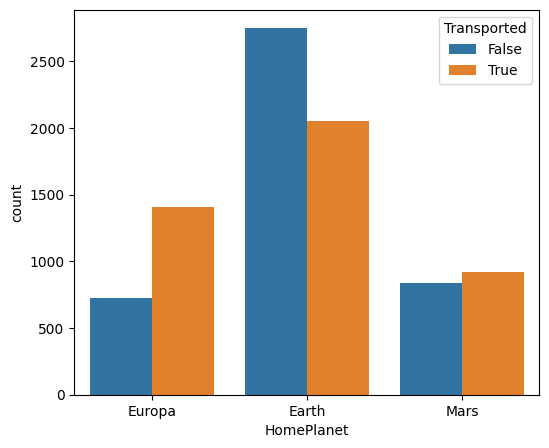

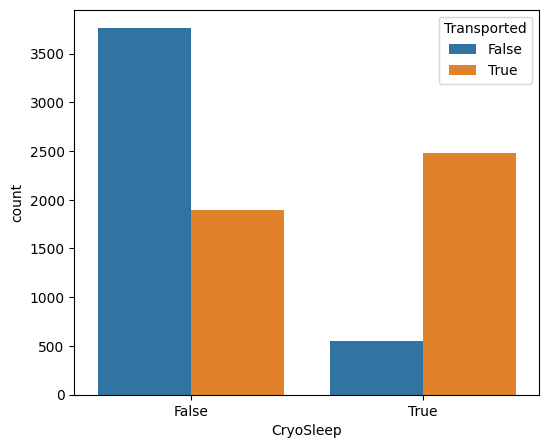

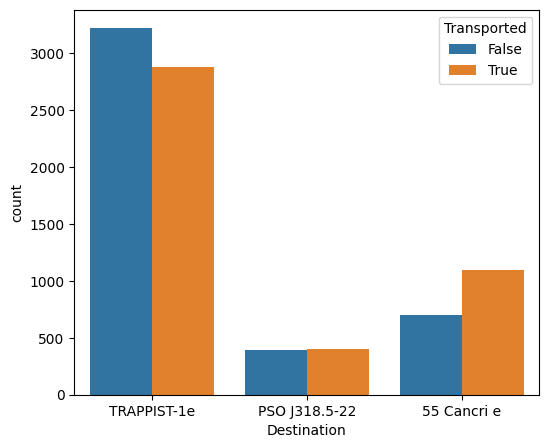

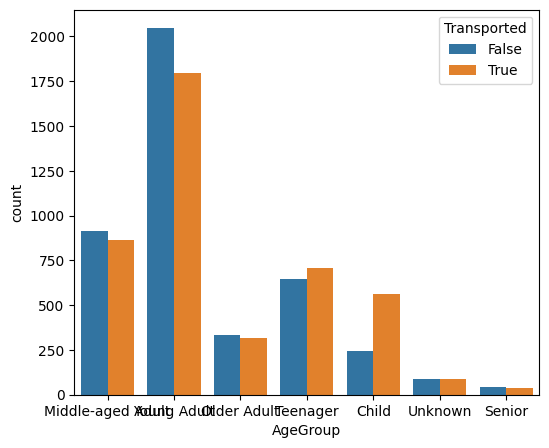

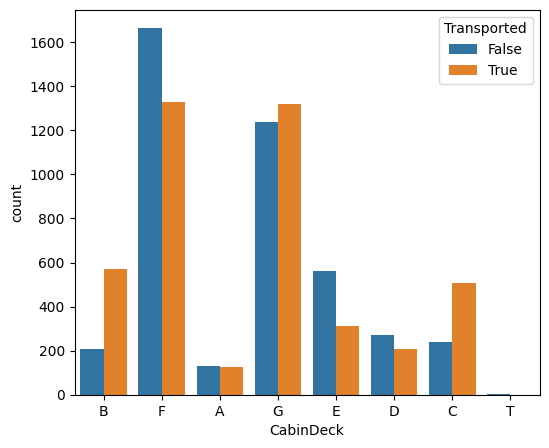

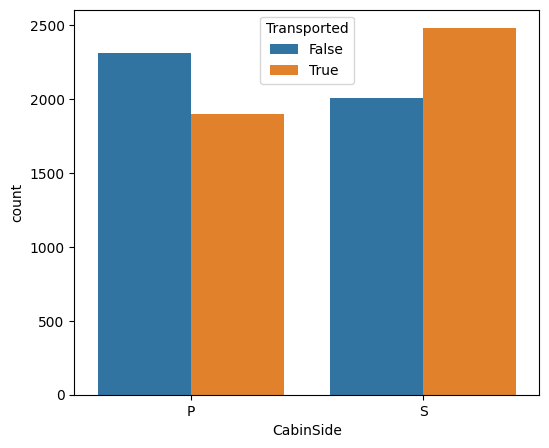

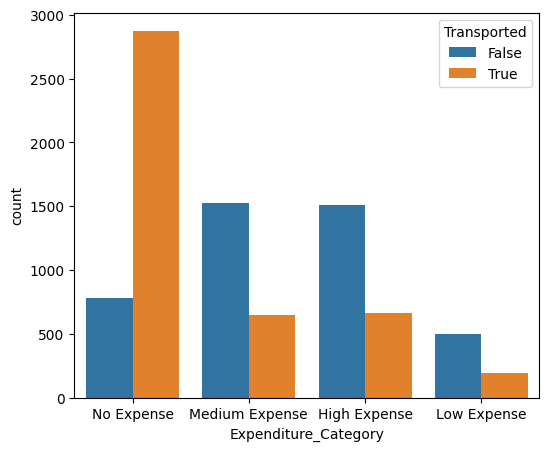

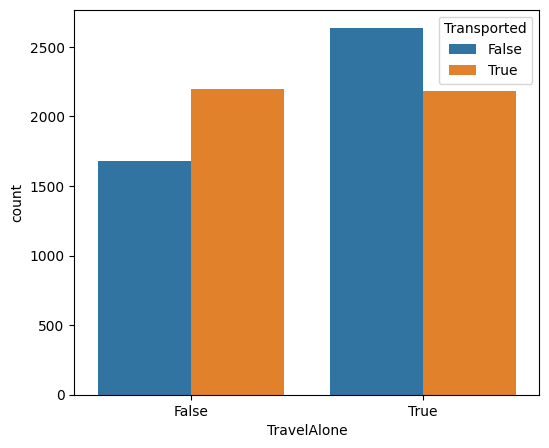

In [609]:
for col in categorical:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=all_data, hue=target_col[0])
    plt.show()

In [610]:
numerical = ['family_size', 'GroupSize']

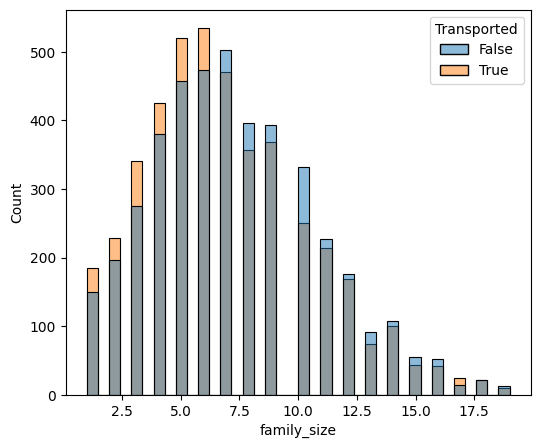

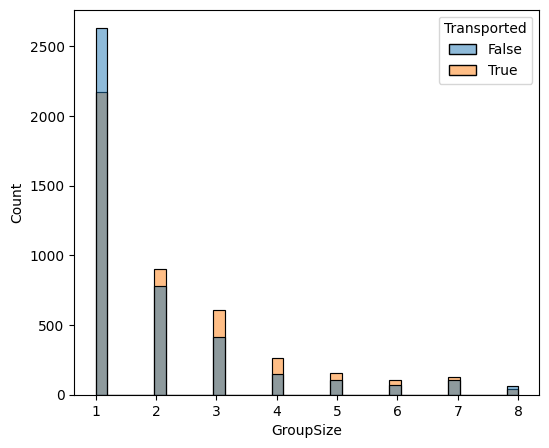

In [611]:
for col in numerical:
    plt.figure(figsize=(6, 5))
    sns.histplot(x=col, data=all_data, hue=target_col[0])
    plt.show()

In [612]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            12970 non-null  object 
 1   CryoSleep             12970 non-null  bool   
 2   Destination           12970 non-null  object 
 3   RoomService           12970 non-null  float64
 4   FoodCourt             12970 non-null  float64
 5   ShoppingMall          12970 non-null  float64
 6   Spa                   12970 non-null  float64
 7   VRDeck                12970 non-null  float64
 8   Transported           8693 non-null   object 
 9   is_train              12970 non-null  int64  
 10  family_size           12970 non-null  float64
 11  GroupSize             12970 non-null  int64  
 12  TravelAlone           12970 non-null  bool   
 13  CabinDeck             12970 non-null  object 
 14  CabinSide             12970 non-null  object 
 15  Cabin_Region1         129

## One-hot Encoding

In [613]:
all_data = pd.get_dummies(all_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'TravelAlone'], drop_first=True)

In [614]:
ordinal_cat = ['AgeGroup', 'CabinDeck', 'CabinSide', 'Expenditure_Category']

In [615]:
le = LabelEncoder()
for col in ordinal_cat:
    all_data[col] = le.fit_transform(all_data[col])

In [616]:
all_data['Cabin_Region1'] = all_data['Cabin_Region1'].astype(int)
all_data['Cabin_Region2'] = all_data['Cabin_Region2'].astype(int)
all_data['Cabin_Region3'] = all_data['Cabin_Region3'].astype(int)
all_data['Cabin_Region4'] = all_data['Cabin_Region4'].astype(int)
all_data['Cabin_Region5'] = all_data['Cabin_Region5'].astype(int)
all_data['Cabin_Region6'] = all_data['Cabin_Region6'].astype(int)

In [617]:
scaled_cols = ['family_size', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupSize', 'TotalExpenses']
# scaled_cols = ['family_size', 'TotalExpenses']

In [618]:
scaler = StandardScaler()
all_data[scaled_cols] = scaler.fit_transform(all_data[scaled_cols])

In [619]:
all_data.corr()['Transported'].abs().sort_values(ascending=False)

,Transported
Transported,1.000000
TotalExpenses,0.468941
CryoSleep_True,0.460132
Expenditure_Category,0.388144
Spa,0.361903
RoomService,0.356220
VRDeck,0.338688
ShoppingMall,0.178536
HomePlanet_Europa,0.176916
FoodCourt,0.135029


## Data Preparation

In [620]:
df = all_data[all_data['is_train'] == 1]
dt = all_data[all_data['is_train'] == 0]

df.drop(['is_train'], axis=1, inplace=True)
dt.drop(['is_train'], axis=1, inplace=True)
dt.drop(['Transported'], axis=1, inplace=True)

df['Transported'].replace({True: 1, False: 0}, inplace=True)

In [621]:
df.isnull().sum()

,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0
family_size,0
GroupSize,0
CabinDeck,0
CabinSide,0


In [622]:
df.duplicated().sum()

581

In [623]:
df.drop_duplicates(inplace=True)

In [624]:
df.duplicated().sum()

0

In [625]:
X = df.drop(['Transported'], axis=1)
y = df['Transported']

In [626]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6489, 24) (1623, 24) (6489,) (1623,)


## Model Training

In [627]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Model Testing and Metrics

In [628]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       857
           1       0.79      0.63      0.70       766

    accuracy                           0.74      1623
   macro avg       0.75      0.74      0.74      1623
weighted avg       0.75      0.74      0.74      1623



Modified Features Accuracy = 0.7517

In [629]:
print(accuracy_score(y_test, y_pred))

0.7436845348120764


In [630]:
sf = pd.read_csv('sample_submission.csv')
sf.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [631]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Transported': y_pred.astype(bool)
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
